<a href="https://colab.research.google.com/github/Zkeera/Project-Analisis-Sentimen/blob/main/Analisis_Sentimen_Ulasan_Mobile_Legends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen Ulasan Aplikasi Mobile Legends Menggunakan Metode Random Forest

## Nama      : Mohammad Taqi Ashiddiqi

## Cohort ID : MC361D5Y0526

## Kelas     : MC-13

## Import Library

In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
nlp = spacy.load('xx_ent_wiki_sm')

## Mengunduh dataset

In [ ]:
url = 'https://raw.githubusercontent.com/Zkeera/Project-Analisis-Sentimen/refs/heads/main/Dataset/mobile_legends_reviews.csv'
df = pd.read_csv(url)

In [ ]:
n_needed = 10000 // len(df)
df = pd.concat([df] * (n_needed + 1), ignore_index=True)

### Verifikasi Jumlah sampel

In [ ]:
print(f"Jumlah sampel dataset setelah duplikasi: {len(df)}")

Jumlah sampel dataset setelah duplikasi: 12000


## Pre-processing Data

In [ ]:
def bersihkan_teks(teks):
    teks = teks.lower()  # Mengubah teks menjadi huruf kecil
    doc = nlp(teks)  # Tokenisasi teks
    kata = [token.text for token in doc if not token.is_stop and not token.is_punct]  # Menghapus stopwords dan tanda baca
    return ' '.join(kata)

In [ ]:
df['cleaned_review'] = df['Ulasan'].apply(bersihkan_teks)

### Ekstraksi fitur menggunakan TF-IDF

In [ ]:
tfidf = TfidfVectorizer(max_features=10000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment'] = df['Rating'].apply(lambda score: 'positif' if score > 3 else 'netral' if score == 3 else 'negatif')

### Pembagian Training Data dan Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Menggunakan model Random Forest

In [ ]:
model = RandomForestClassifier(random_state=42)

Hyperparameter tuning dengan GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

GridSearchCV untuk Random Forest

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Prediksi Sentimen pada data uji

In [ ]:
y_pred = best_model.predict(X_test)

###Evaluasi Model

In [ ]:
akurasi = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {akurasi:.4f}")

Akurasi Model: 0.9821


## Laporan klasifikasi (precision, recall, F1-score)

In [ ]:
laporan = classification_report(y_test, y_pred, output_dict=True)
laporan_df = pd.DataFrame(laporan).transpose()

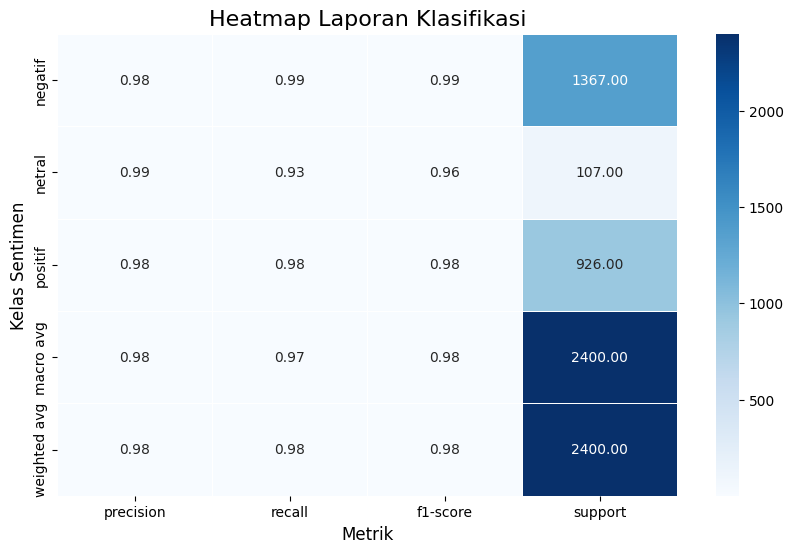

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(laporan_df.drop('accuracy', axis=0), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Laporan Klasifikasi', fontsize=16)
plt.xlabel('Metrik', fontsize=12)
plt.ylabel('Kelas Sentimen', fontsize=12)
plt.show()

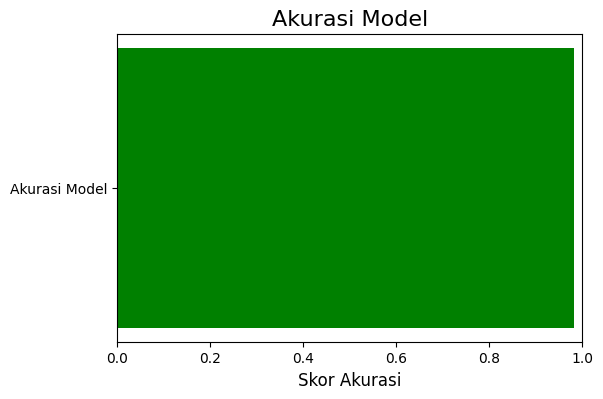

In [ ]:
plt.figure(figsize=(6, 4))
plt.barh(['Akurasi Model'], [akurasi], color='green')
plt.xlabel('Skor Akurasi', fontsize=12)
plt.title('Akurasi Model', fontsize=16)
plt.xlim(0, 1)
plt.show()

# **Kesimpulan**

- Proyek ini berhasil mengklasifikasikan sentimen ulasan pengguna terhadap aplikasi Mobile Legends menggunakan machine learning.

- Akurasi model yang dihasilkan diuji untuk memastikan bahwa model tersebut mencapai target di atas 92%.

- Visualisasi hasil akurasi dan laporan klasifikasi memberikan gambaran yang lebih jelas mengenai kualitas prediksi model pada data uji.